# ENGS 93 Quiz 3 Practice
Cameron Wolfe 2/22/2024

In [1]:
import numpy as np
from scipy.stats import t, norm, chi2
from math import sqrt, exp, ceil, floor
import matplotlib.pyplot as plt

## 10-1

In [2]:
xbar1 = 4.7
xbar2 = 7.8
n1 = 10
n2 = 15
sigma1 = 10
sigma2 = 5

se_coeff = sqrt(sigma1**2 / n1 + sigma2**2 / n2)

z = (xbar1 - xbar2) / se_coeff
p = 2 * norm.sf(abs(z))
print("P-value:", p)

P-value: 0.3640964293652712


Cannot reject $H_0$ as $p > \alpha$

In [3]:
z_alpha = norm.ppf(0.975)
ci = (xbar1 - xbar2 - z_alpha * se_coeff, xbar1 - xbar2 + z_alpha * se_coeff)
print("95% CI:", ci)

95% CI: (-9.794551484211977, 3.594551484211978)


Because 0 is in 95% CI, cannot reject $H_0$

In [4]:
beta = norm.cdf(z_alpha - 3 / se_coeff) - norm.cdf(-z_alpha - 3 / se_coeff)
print("Power:", 1-beta) 

Power: 0.14197107914234097


In [5]:
z_beta = norm.ppf(0.95)
n = ceil((z_alpha + z_beta)**2 * (sigma1**2 + sigma2**2) / 3 ** 2)
print("Sample size needed:", n)

Sample size needed: 181


## 10-3

In [6]:
xbar1 = 24.5
xbar2 = 21.3
n1 = 10
n2 = 15
sigma1 = 10
sigma2 = 5

se_coeff = sqrt(sigma1**2 / n1 + sigma2**2 / n2)

z = (xbar1 - xbar2) / se_coeff
p = norm.sf(z)
print("P-value:", p)

P-value: 0.17441424161364644


Cannot reject $H_0$ as $p > \alpha$

In [7]:
z_alpha = norm.ppf(0.99)
ci = (xbar1 - xbar2 - z_alpha * se_coeff, np.inf)
print("95% CI:", ci)

95% CI: (-4.7459907099304255, inf)


Because 0 is contained within the CI, we cannot reject $H_0$

In [8]:
beta = norm.cdf(z_alpha - 2 / se_coeff) - norm.cdf(-z_alpha - 2 / se_coeff)
print("Power:", 1-beta) 

Power: 0.042654892076773865


In [9]:
z_alpha = norm.ppf(0.95)
z_beta = norm.ppf(0.95)
n = ceil((z_alpha + z_beta)**2 * (sigma1**2 + sigma2**2) / 3 ** 2)
print("Sample size needed:", n)

Sample size needed: 151


## 10-5

$H_0$: $\mu_1 - \mu_2 = 10$, $H_1$: $\Delta\mu > 10$

In [10]:
xbar1 = 162.5
xbar2 = 155.0
n1 = 10
n2 = 12
sigma1 = 1
sigma2 = 1

delta_mu = 10

se_coeff = sqrt(sigma1**2 / n1 + sigma2**2 / n2)

z = (xbar1 - xbar2 - 10) / se_coeff
p = norm.sf(z)
print("P-value:", p)

P-value: 0.9999999973701791


Cannot reject $H_0$, therefore they should not use plastic 1

In [11]:
z_alpha = norm.ppf(0.95)
ci = (xbar1 - xbar2 - z_alpha * se_coeff, np.inf)
print("95% CI:", ci)

95% CI: (6.795715753464915, inf)


In [12]:
beta = norm.cdf(z_alpha - 2 / se_coeff)
print("Power:", 1-beta) 

Power: 0.9987615122284447


Yes, the sample sizes are sufficient, as the power is basically 1, meaning that you are nearly guaranteed to detect a difference in means

## 10-7

$H_0$: $\mu_1 = \mu_2$, $H_1$: $\mu_1 < \mu_2$

In [13]:
xbar1 = 89.6
xbar2 = 92.5
n1 = 15
n2 = 20
sigma1 = sqrt(1.5)
sigma2 = sqrt(1.2)

se_coeff = sqrt(sigma1**2 / n1 + sigma2**2 / n2)

z = (xbar1 - xbar2) / se_coeff
p = norm.cdf(z)
print("P-value:", p)

P-value: 2.083858158671828e-13


We can reject $H_0$ and conclude that $\mu_2 > \mu_1$

In [14]:
z_alpha = norm.ppf(0.99)
ci = (-np.inf, xbar1 - xbar2 + z_alpha * se_coeff)
print("95% CI:", ci)

95% CI: (-inf, -1.9694608503836695)


Because $0\notin CI$, we can reject $H_0$

In [15]:
E = 1
z_alpha = norm.ppf(0.975)

n = (z_alpha**2 / E) * (sigma1**2 + sigma2**2)
print("Sample size needed:", ceil(n))

Sample size needed: 11


## 10-9

In [16]:
arr1 = np.array([57.9, 66.2, 65.4, 65.4, 65.2, 62.6, 67.6, 63.7, 67.2, 71.0])
arr2 = np.array([66.4, 71.7, 70.3, 69.3, 64.8, 69.6, 68.6, 69.4, 65.3, 68.8])

xbar1 = arr1.mean()
xbar2 = arr2.mean()
n1 = len(arr1)
n2 = len(arr2)
sigma1 = 3
sigma2 = 3

se_coeff = sqrt(sigma1**2 / n1 + sigma2**2 / n2)

z = (xbar1 - xbar2) / se_coeff
p = 2 * norm.sf(abs(z))
print("P-value:", p)

z_alpha = norm.ppf(0.975)
ci = (xbar1 - xbar2 - z_alpha * se_coeff, xbar1 - xbar2 + z_alpha * se_coeff)
print("95% CI:", ci)

P-value: 0.017072661093788775
95% CI: (-5.829567621729733, -0.5704323782702438)


Yes is does, as 0 difference in mean active concentration is not within the 95% CI, therefore there is a statistically significant difference between the two quantities

In [17]:
beta = norm.cdf(z_alpha - 5 / se_coeff) - norm.cdf(-z_alpha - 5 / se_coeff)
print("Power:", 1-beta)

Power: 0.9613704804982451


I would consider this to be inadequate, as the chance of a Type II error is around 50%, which is way too high.

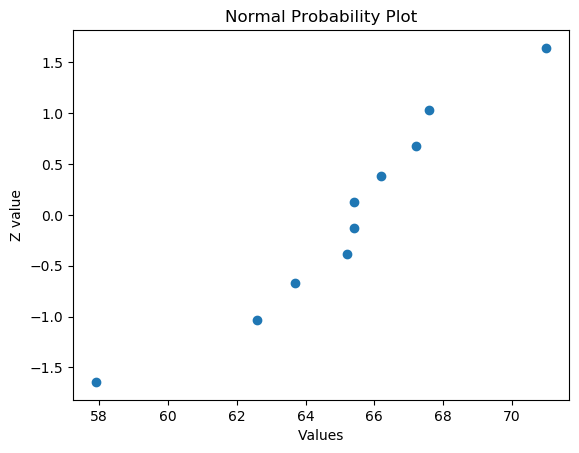

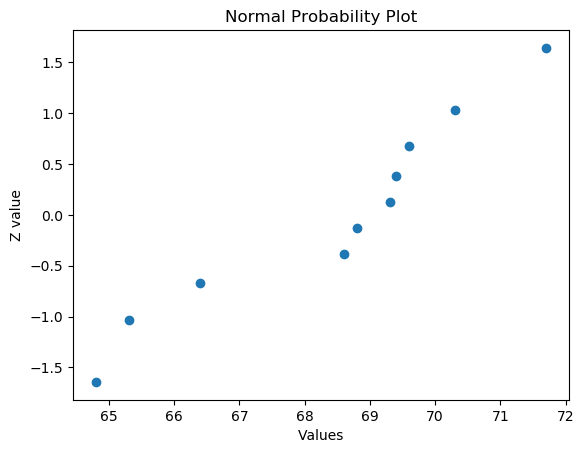

In [18]:
def normal_probability_plot(data_array: np.ndarray) -> None:
    sorted_array = np.sort(data_array.flatten())

    n = len(sorted_array)

    z = np.zeros(n)

    for i in range(n):
        z[i] = norm.ppf((i + 0.5) / n)

    plt.scatter(sorted_array, z)
    plt.title("Normal Probability Plot")
    plt.xlabel("Values")
    plt.ylabel("Z value")
    plt.show()

normal_probability_plot(arr1)
normal_probability_plot(arr2)

Both data sets appear to be normally distributed

## 10-13

In [19]:
xbar1 = 6.2
xbar2 = 7.8
n1 = 15
n2 = 15
s1 = sqrt(4)
s2 = sqrt(6.25)

s_pool = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))

se_coeff = s_pool * sqrt(1 / n1 + 1 / n2)

t_val = (xbar1 - xbar2) / se_coeff
p = t.cdf(t_val, n1 + n2 - 2)
print("P-value:", p)

P-value: 0.031540216910763794


We can reject $H_0$

In [20]:
t_alpha = t.ppf(0.95, n1 + n2 - 2)
ci = (-np.inf, xbar1 - xbar2 + t_alpha * se_coeff)

print("95% CI:", ci)

95% CI: (-inf, -0.19377749107656195)


$0 \in CI$ therefore cannot reject $H_0$

In [21]:
print(3 / se_coeff - t_alpha)
beta = t.sf(3 / se_coeff - t_alpha, n1 + n2 - 2)
print("Power:", 1-beta)

1.9280193391888722
Power: 0.9679747113700826


In [22]:
d = 2.5 / (2 * s_pool)
print("d for OC Curve:", d)

d for OC Curve: 0.5521576303742327


$n^* = 40, n_1 = n_2 = \left\lceil\frac{n^*+1}{2}\right\rceil = 21$

## 10-15

$H_0$: $\mu_1=\mu_2$, $H_1$: $\mu_1\neq\mu_2$

In [23]:
xbar1 = 8.73
xbar2 = 8.68
n1 = 15
n2 = 17
s1 = sqrt(0.35)
s2 = sqrt(0.40)

s_pool = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))

se_coeff = s_pool * sqrt(1 / n1 + 1 / n2)

t_val = (xbar1 - xbar2) / se_coeff
p = 2 * t.sf(abs(t_val), n1 + n2 - 2)
print("P-value:", p)

P-value: 0.8196697157339579


Cannot reject $H_0$, insufficient evidence to claim machines produce different mean diameters

In [24]:
t_alpha = t.ppf(0.975, n1+n2-2)
ci = (xbar1 - xbar2 - t_alpha * se_coeff, xbar1 - xbar2 + t_alpha * se_coeff)

print("95% CI:", ci)

95% CI: (-0.39401452100926715, 0.49401452100926857)


Because 0 is in the CI, we cannot conclude that there is a significant difference between the machines

## 10-17

In [25]:
xbar1 = 86
xbar2 = 89
n1 = 12
n2 = 15
s1 = 3
s2 = 2

s_pool = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))

se_coeff = s_pool * sqrt(1 / n1 + 1 / n2)

t_val = (xbar1 - xbar2) / se_coeff
p = t.cdf(t_val, n1 + n2 - 2)
print("P-value:", p)

P-value: 0.002309560748636289


Yes, we can reject $H_0$ as $P < \alpha$

In [26]:
t_alpha = t.ppf(0.99, n1+n2-2)
ci = (-np.inf, xbar1 - xbar2 + t_alpha * se_coeff)

print("95% CI:", ci)

95% CI: (-inf, -0.6034494296702118)


## 10-19

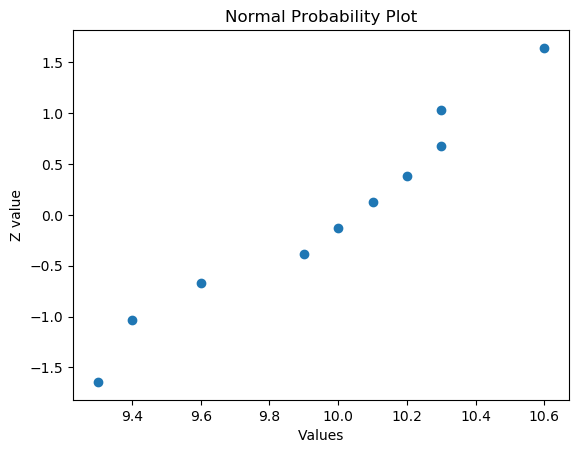

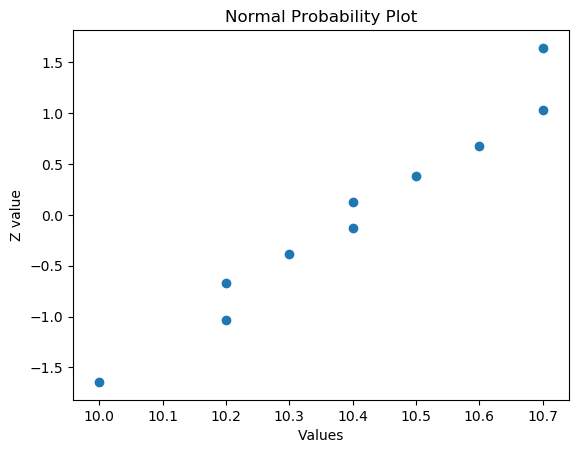

In [27]:
arr1 = np.array([9.9, 10.6, 9.4, 10.3, 9.3, 10.0, 9.6, 10.3, 10.2, 10.1])
arr2 = np.array([10.2, 10.0, 10.6, 10.2, 10.7, 10.7, 10.4, 10.4, 10.5, 10.3])

xbar1 = arr1.mean()
xbar2 = arr2.mean()
n1 = len(arr1)
n2 = len(arr2)
s1 = np.std(arr1, ddof=1)
s2 = np.std(arr2, ddof=1)

normal_probability_plot(arr1)
normal_probability_plot(arr2)

Both samples appear to be normally distributed

In [28]:
s_pool = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))

se_coeff = s_pool * sqrt(1 / n1 + 1 / n2)

t_val = (xbar1 - xbar2) / se_coeff
p = 2 * t.sf(abs(t_val), n1 + n2 - 2)
print("P-value:", p)

P-value: 0.011150646764286247


No, the mean etch rate for the two solutions is not equal, as $p < \alpha$

In [29]:
t_alpha = t.ppf(0.975, n1+n2-2)
ci = (xbar1 - xbar2 - t_alpha * se_coeff, xbar1 - xbar2 + t_alpha * se_coeff)

print("95% CI:", ci)

95% CI: (-0.7494660577570234, -0.11053394224297602)


## 10-21

In [30]:
xbar1 = 420
xbar2 = 426
n1 = 21
n2 = 21
s1 = 4
s2 = 3

s_pool = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))

se_coeff = s_pool * sqrt(1 / n1 + 1 / n2)

t_val = (xbar1 - xbar2) / se_coeff
p = 2 * t.sf(abs(t_val), n1 + n2 - 2)
print("P-value:", p)

P-value: 2.3874112324086073e-06


In [31]:
d = 3 / (2 * 4)
print("d for OC chart:", d)

d for OC chart: 0.375


$n^*=75$ , $n_1=n_2 = \left\lceil\frac{n^*+1}{2}\right\rceil = 38$

## 10-23

In [32]:
xbar1 = 20
xbar2 = 15
n1 = 25
n2 = 25
s1 = 2
s2 = 8

se_coeff = sqrt(s1**2 / n1 + s2**2 / n2)

nu = se_coeff**2 / ((s1**2 / n1)**2 / (n1 - 1) + (s2**2 / n2)**2 / (n2 - 1))

$H_0: \mu_1 = \mu_2$, $H_1: \mu_1 \neq \mu_2$

In [33]:
t_val = (xbar1 - xbar2) / se_coeff
p = 2 * t.sf(t_val, nu)
print("P_value:", p)

P_value: 0.012748675794672449


Can reject $H_0$

$H_0: \mu_1 = \mu_2$, $H_1: \mu_1 > \mu_2$

In [34]:
p = t.sf(t_val, nu)
print("P_value:", p)

P_value: 0.006374337897336224


Can reject $H_0$

In [35]:
t_alpha = t.ppf(0.975, nu)
ci = (xbar1 - xbar2 - t_alpha * se_coeff, xbar1 - xbar2 + t_alpha * se_coeff)
print("Part a 95% CI:", ci)

t_alpha = t.ppf(0.95, nu)
ci = (xbar1 - xbar2 - t_alpha * se_coeff, np.inf)
print("Part b 95% CI:", ci)

Part a 95% CI: (1.3213488066360717, 8.678651193363928)
Part b 95% CI: (2.008431792195389, inf)


## 10-29

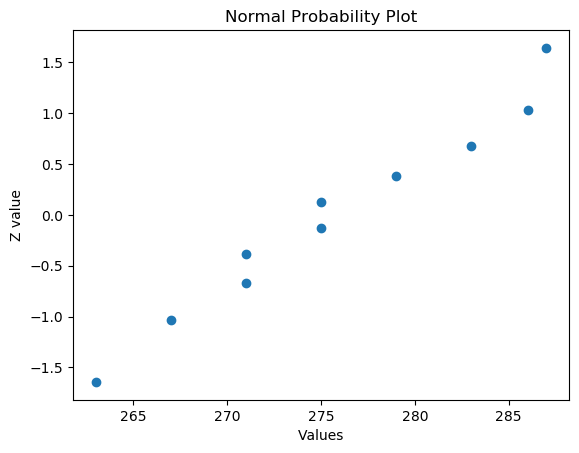

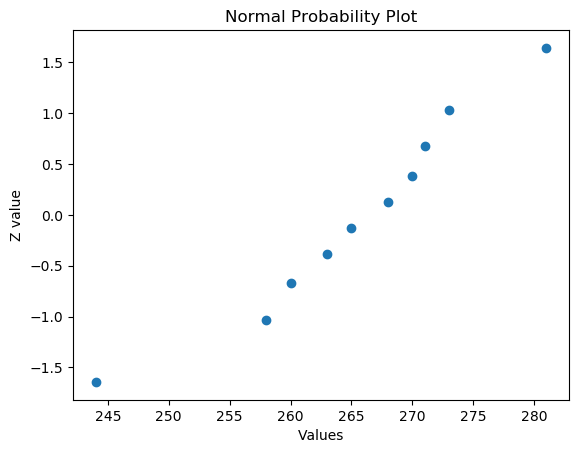

Sample standard deviations: (8.028421735033328, 10.044899203078149)


In [39]:
arr1 = np.array([275, 286, 287, 271, 283, 271, 279, 275, 263, 267])
arr2 = np.array([258, 244, 260, 265, 273, 281, 271, 270, 263, 268])

xbar1 = arr1.mean()
xbar2 = arr2.mean()
n1 = len(arr1)
n2 = len(arr2)
s1 = np.std(arr1, ddof=1)
s2 = np.std(arr2, ddof=1)

normal_probability_plot(arr1)
normal_probability_plot(arr2)

print("Sample standard deviations:", (s1, s2))

Sample standard deviations are about the same, can conclude same variance.

In [40]:
s_pool = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))

se_coeff = s_pool * sqrt(1 / n1 + 1 / n2)

t_val = (xbar1 - xbar2) / se_coeff
p = 2 * t.sf(abs(t_val), n1 + n2 - 2)
print("P-value:", p)

P-value: 0.019784887263473234


In [41]:
t_alpha = t.ppf(0.975, n1+n2-2)
ci = (xbar1 - xbar2 - t_alpha * se_coeff, xbar1 - xbar2 + t_alpha * se_coeff)

print("95% CI:", ci)

95% CI: (1.8568244113866044, 18.94317558861335)


In [42]:
d = 5 / (2 * s_pool)
print("d for OC chart:", d)

d for OC chart: 0.27494486380847216


Power of 0.1

Greater than 50